<a href="https://colab.research.google.com/github/ayakusan/billboard-inpaint/blob/main/BillboardTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Billboard Removal**
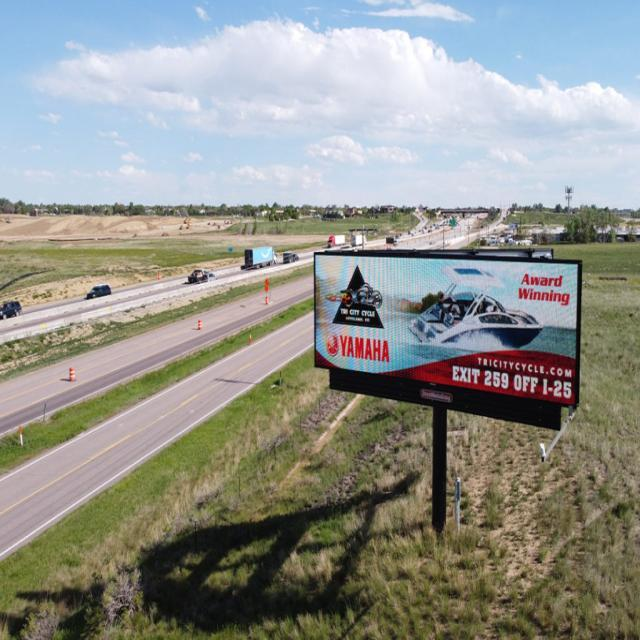
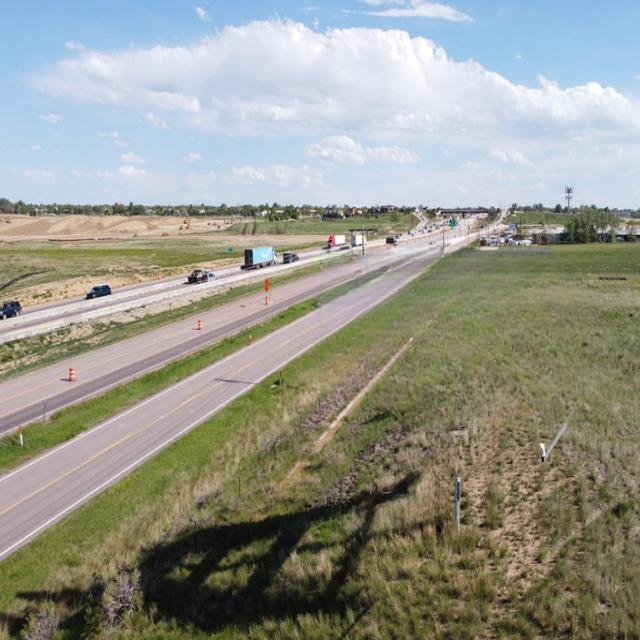

In [1]:
%pip install ultralytics

from ultralytics import YOLO
import cv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 11.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

# Training & Importing the dataset
do not run most runs will take a long time

In [2]:

!curl -L "https://app.roboflow.com/ds/sJwUagDGl6?key=BiPK7clYtV" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   2732      0 --:--:-- --:--:-- --:--:--  2728
100 50.4M  100 50.4M    0     0  12.2M      0  0:00:04  0:00:04 --:--:-- 17.8M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/004_jpeg_jpg.rf.a6e8c9727e5ed830528c6b993cc078e5.jpg  
 extracting: test/images/005a39553e6667f5_jpg.rf.bb1e1c512ab43a1e16a467f97ab64c69.jpg  
 extracting: test/images/00b12b1d815fac40_jpg.rf.744c76307987e08dec39556ff8936723.jpg  
 extracting: test/images/066687f8b782ab5b_jpg.rf.d1eab08a33b49a03508e4d12e8e63e7f.jpg  
 extracting: test/images/0c0a22bfd0da315a_jpg.rf.75b90f1c63d5bc272bd224fe34902ea6.jpg  
 extracting: test/images/0cc05f0536cf1f92_jpg.rf.a4360a776affe864fa01a

**! DO NOT RUN THIS !**
already trained

In [3]:
!yolo task=segment mode=train model=yolov8s-seg.pt  data=/content/data.yaml epochs=30 imgsz=640

100% 22.8M/22.8M [00:00<00:00, 285MB/s]
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

In [4]:
from IPython.display import Image
from google.colab.patches import cv2_imshow
import cv2

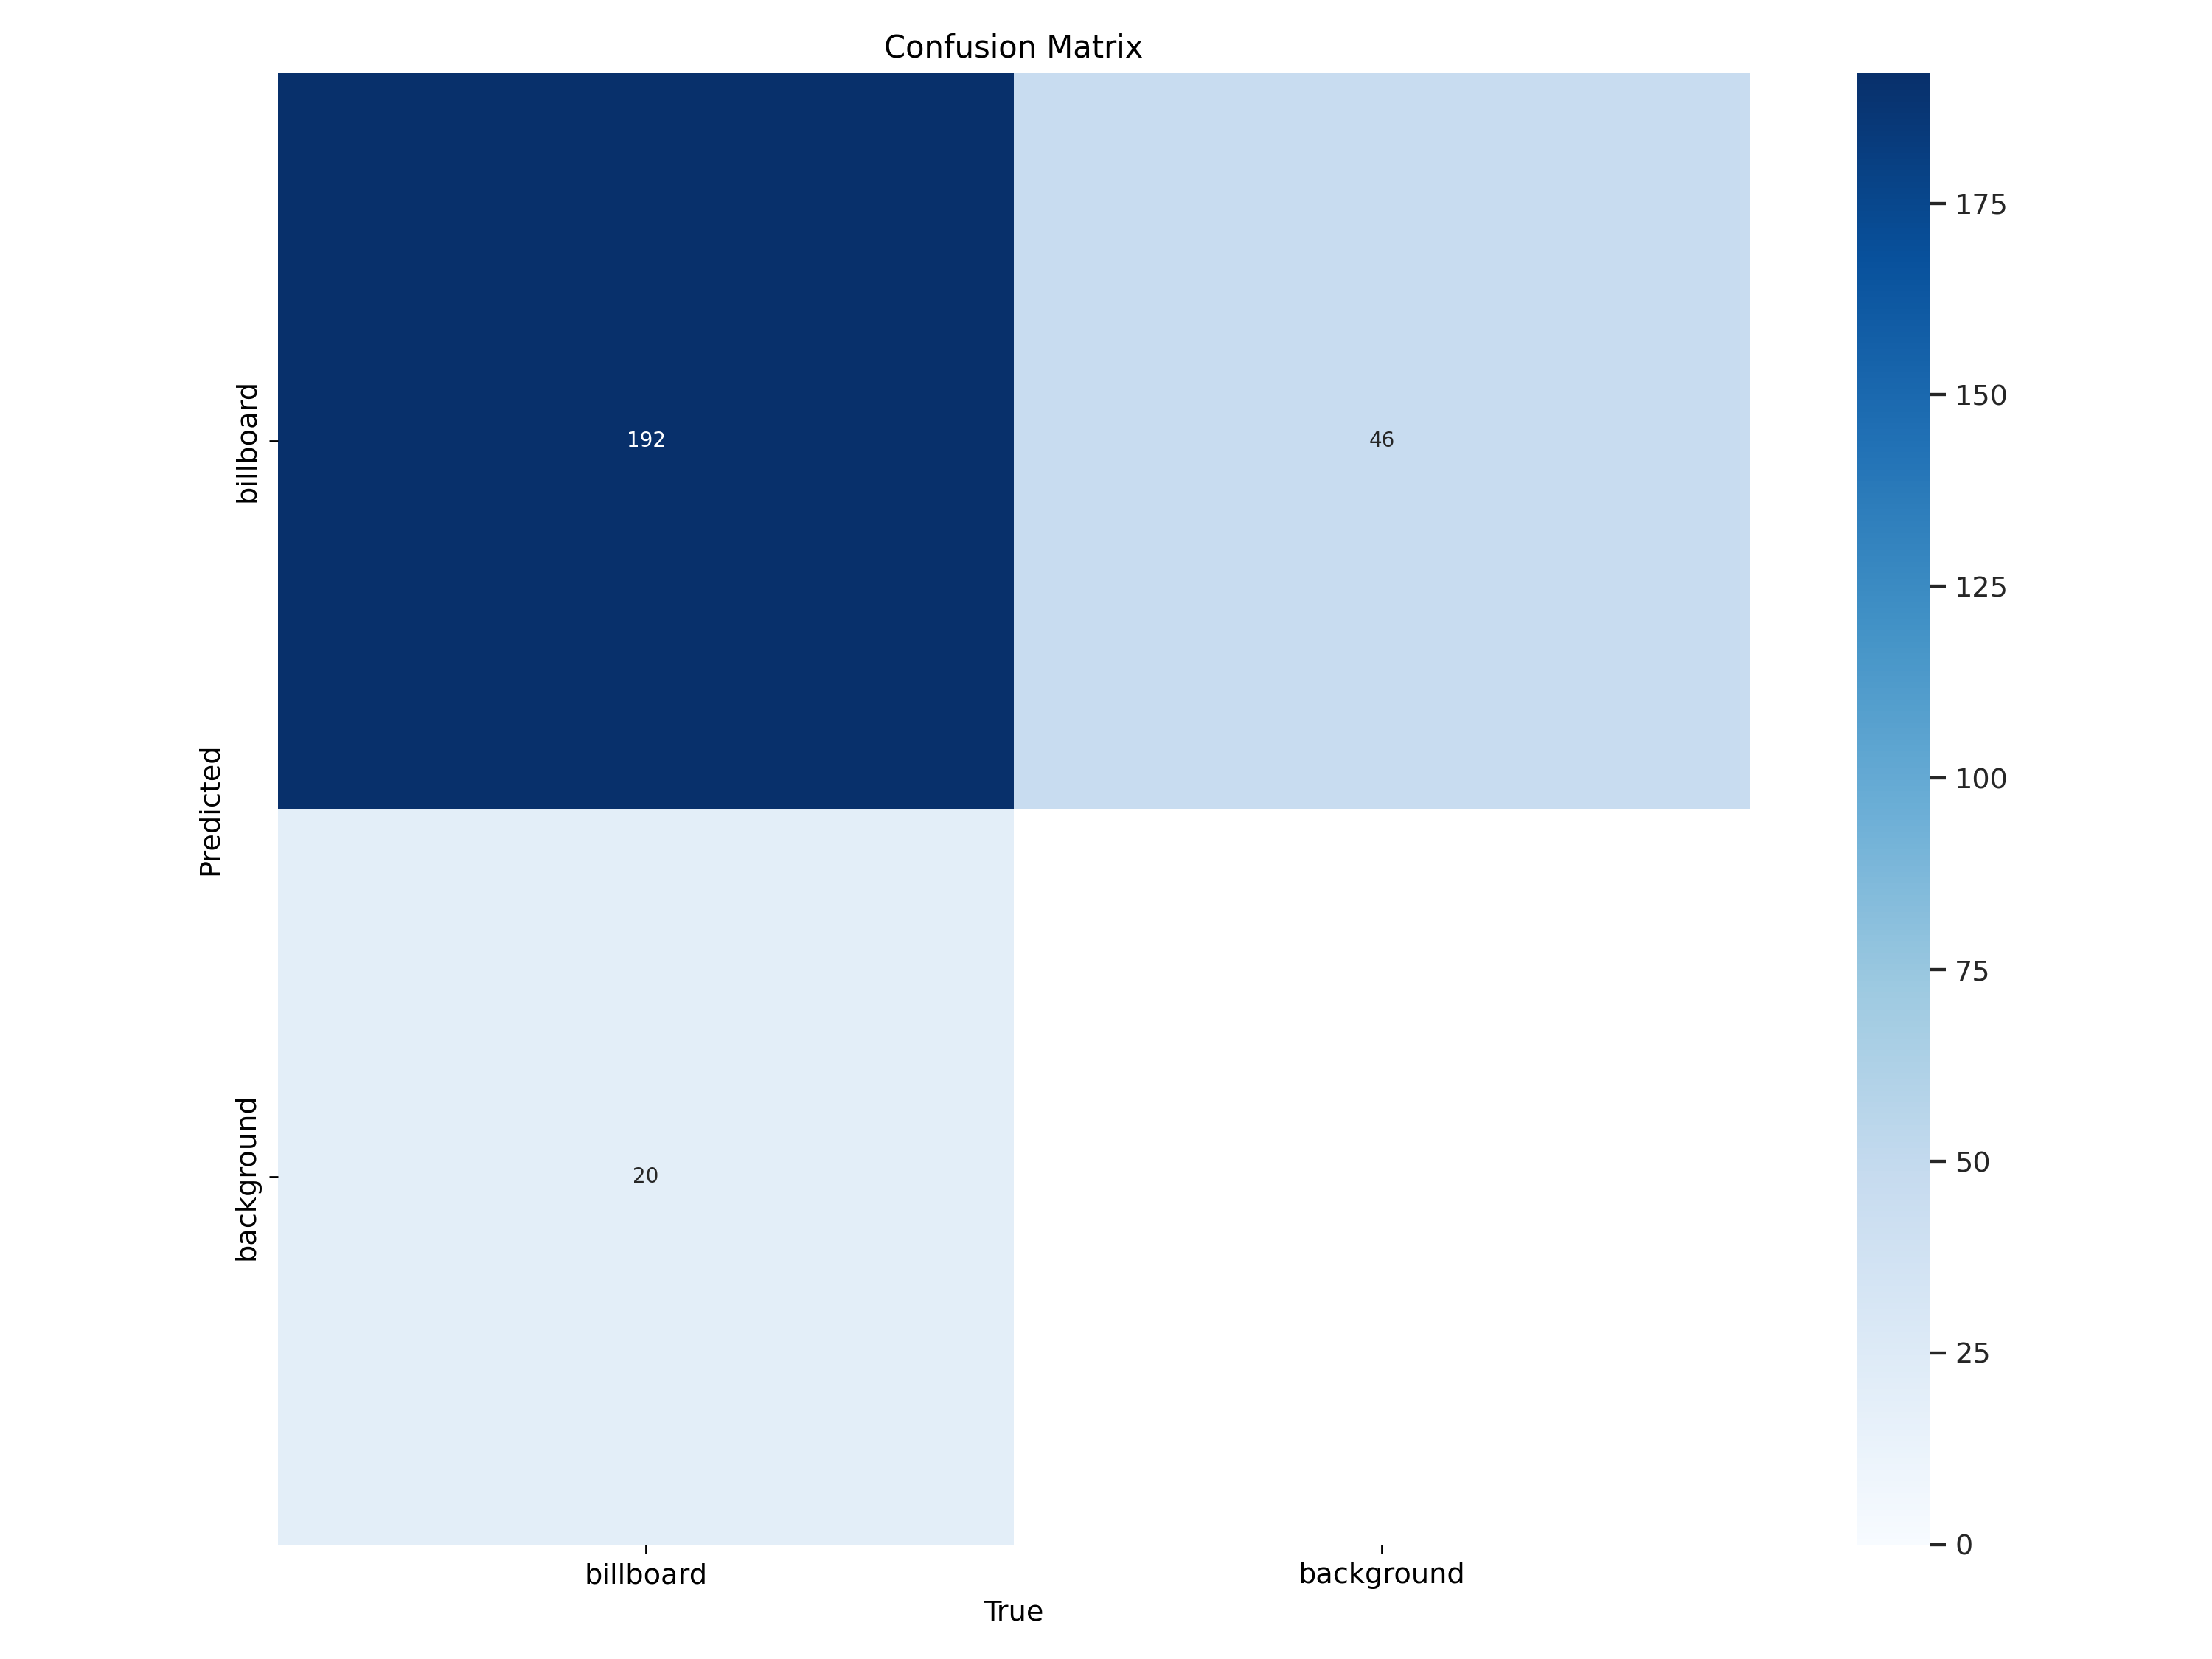

In [5]:
Image(filename=f'/content/runs/segment/train/confusion_matrix.png', width=600)

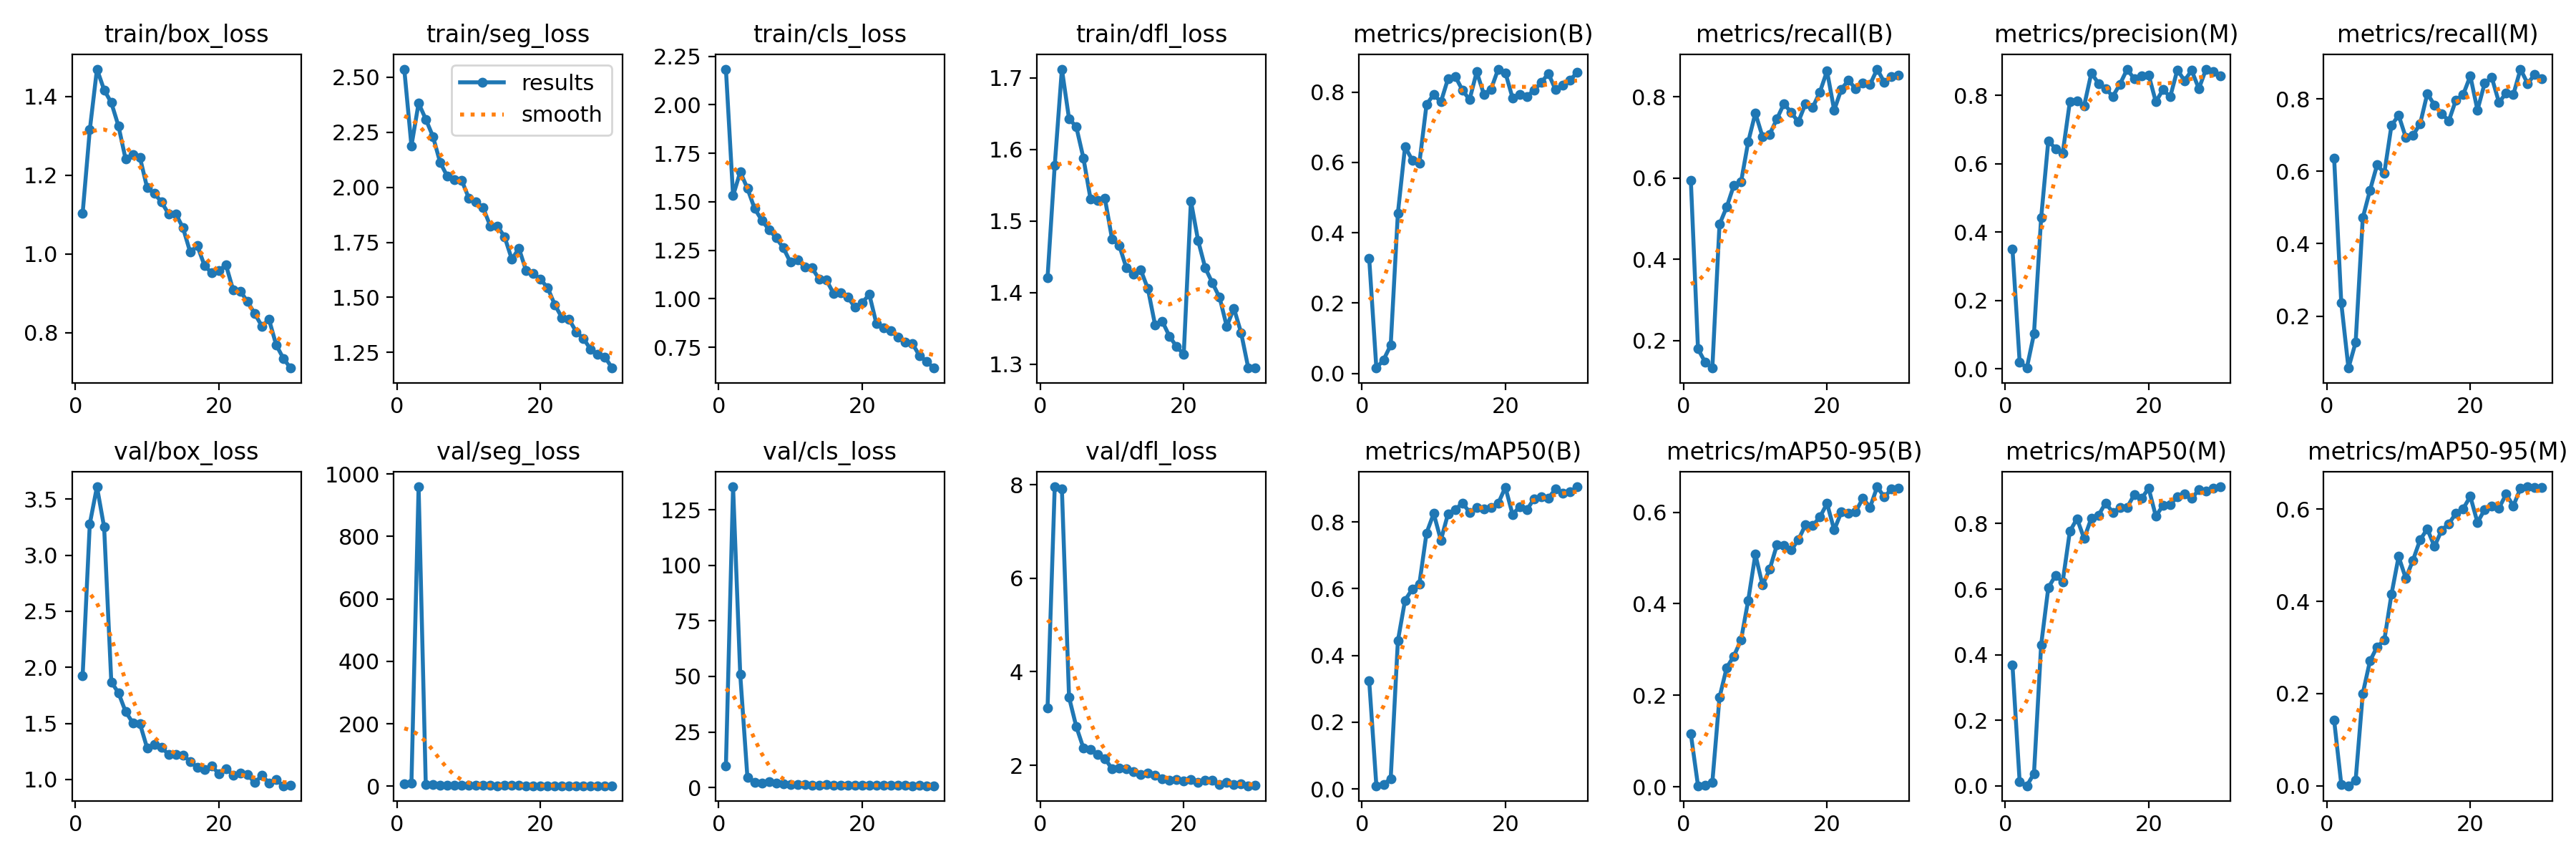

In [6]:
Image(filename=f'/content/runs/segment/train/results.png', width=600)

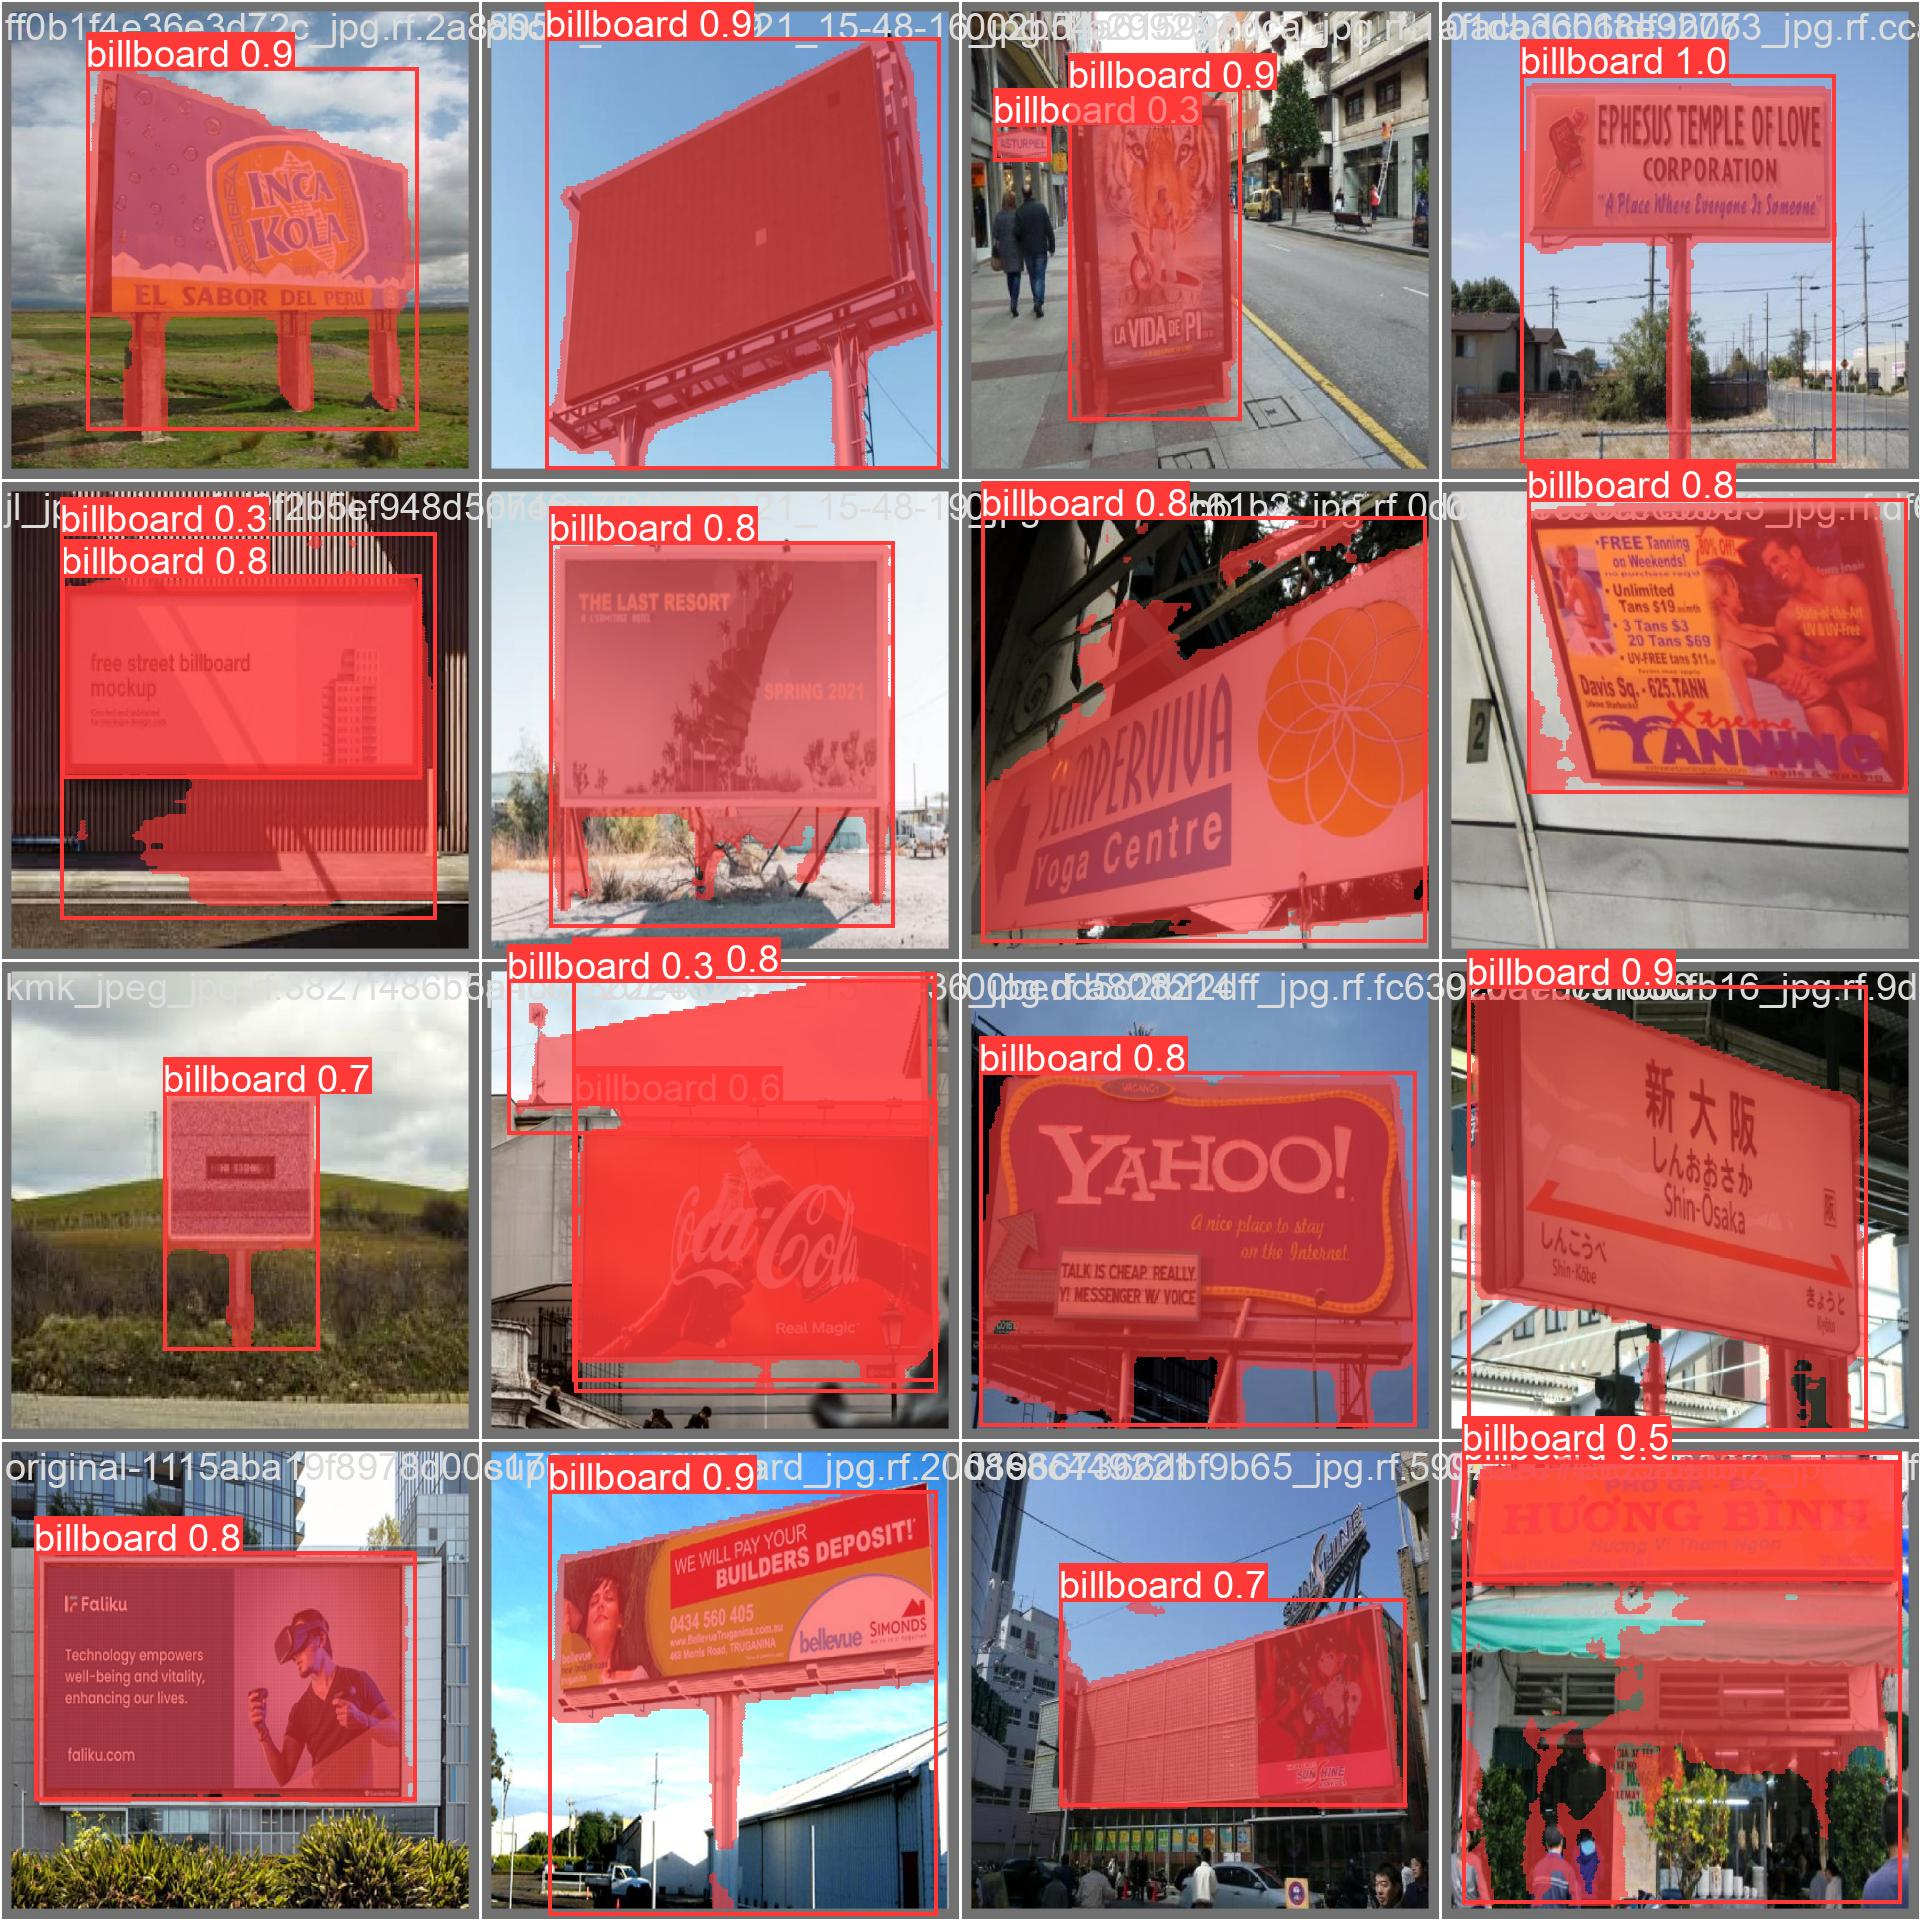

In [7]:
Image(filename=f'/content/runs/segment/train/val_batch0_pred.jpg', width=600)

# Predict

In [8]:
model_path = '/content/runs/segment/train/weights/best.pt'

model = YOLO(model_path)

In [9]:
import numpy as np
%pip install simple-lama-inpainting
from simple_lama_inpainting import SimpleLama
from PIL import Image
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=54b19ab92c6dbd478344e8ae949fa7903c1c22499447853fafcf4319f8f20b64
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


# Inpainting
run it and enter the path for the image that has the billboard we want to remove

Enter Image Path/content/test/images/0cc8554c886bd42b_jpg.rf.eba4519d2bf7d6128493998616349b6f.jpg

image 1/1 /content/test/images/0cc8554c886bd42b_jpg.rf.eba4519d2bf7d6128493998616349b6f.jpg: 640x640 1 billboard, 21.1ms
Speed: 4.7ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
2 labels saved to runs/segment/predict/labels


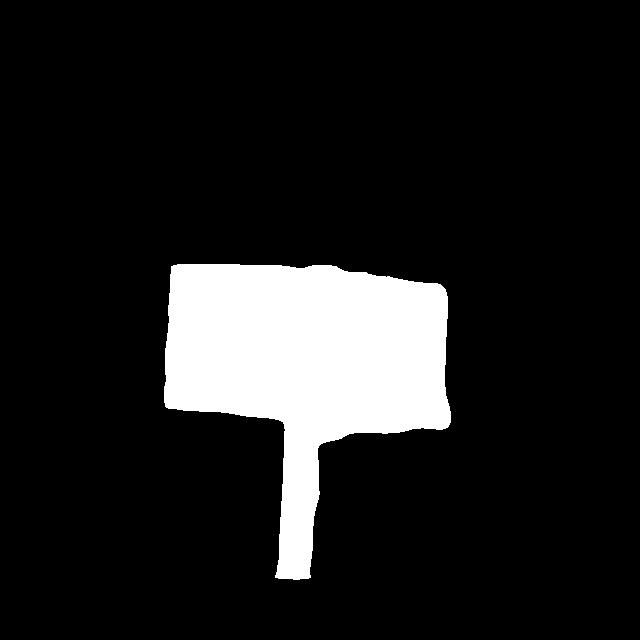

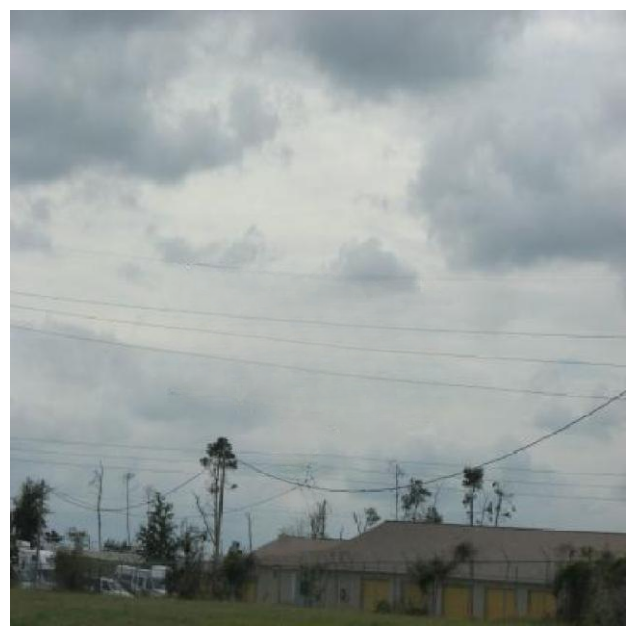

In [12]:
imagepath = input("Enter Image Path")
predict = model.predict(imagepath, save = True, save_txt = True)

mask_image =(predict[0].masks.data[0].cpu().numpy() * 255).astype("uint8")
cv2_imshow(mask_image)
cv2.imwrite('/content/inpaint/predict_mask.png',mask_image)

simple_lama = SimpleLama()
# Load image and mask

maskpath = "/content/inpaint/predict_mask.png"

test_image = Image.open(imagepath)
test_mask = Image.open(maskpath)
# Inpainting
testfinal = simple_lama(test_image, test_mask)
test_image.save("/content/inpaint/original.png")
testfinal.save("/content/inpaint/inpainted.png")
# Display the inpainted image
plt.figure(figsize=(8, 8))
plt.imshow(testfinal)
plt.axis('off')  # Turn off axis
plt.show()

In [19]:
!zip -r content.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 23%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2024.04.11/ (stored 0%)
  adding: content/.config/logs/2024.04.11/13.20.28.090352.log (deflated 91%)
  adding: content/.config/logs/2024.04.11/13.21.26.545746.log (deflated 56%)
  adding: content/.config/logs/2024.04.11/13.20.55.387089.log (deflated 58%)
  adding: content/.config/logs/2024.04.11/13.21.25.919190.log (deflated 57%)

In [18]:
from google.colab import drive
drive.flush_and_unmount()